In [5]:
import pandas as pd
import matplotlib.pyplot as plt

1. Tạo Dataframe như dữ liệu đã cho trên.

In [18]:
import pandas as pd

data = {
    "Product": ["Laptop", "Phone", "Chair", "Desk", "Headphone", "Monitor", "Sofa", "Keyboard", "Mouse", "Tablet"],
    "Category": ["Electronics", "Electronics", "Furniture", "Furniture", "Accessories", "Electronics", "Furniture", "Accessories", "Accessories", "Electronics"],
    "Price": [1500, 800, 120, 300, 200, 600, 700, 150, 50, 400],
    "Date": ["2024-01-15", "2024-02-10", "2024-03-18", "2024-04-12", "2024-05-20", "2024-06-20", "2024-02-08", "2024-07-14", "2024-09-30", "2024-10-05"],  # Add the missing date
    "Quantity": [2, 5, 3, 1, 4, 2, 1, 6, 8, 3]
}

df = pd.DataFrame(data)
print(df)


     Product     Category  Price        Date  Quantity
0     Laptop  Electronics   1500  2024-01-15         2
1      Phone  Electronics    800  2024-02-10         5
2      Chair    Furniture    120  2024-03-18         3
3       Desk    Furniture    300  2024-04-12         1
4  Headphone  Accessories    200  2024-05-20         4
5    Monitor  Electronics    600  2024-06-20         2
6       Sofa    Furniture    700  2024-02-08         1
7   Keyboard  Accessories    150  2024-07-14         6
8      Mouse  Accessories     50  2024-09-30         8
9     Tablet  Electronics    400  2024-10-05         3


2. Hiển thị thông tin Dataframe vừa tạo.

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Product   10 non-null     object
 1   Category  10 non-null     object
 2   Price     10 non-null     int64 
 3   Date      10 non-null     object
 4   Quantity  10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes
None


# 3. Tính giá trị trung bình của cột Price

In [20]:
print("Price AGE:", df["Price"].mean())

Price AGE: 482.0


4. Nhóm dữ liệu cột <Category> và tình tổng trung bình cột <Quantity>.

In [22]:
print(df.groupby("Category")["Quantity"].mean())

Category
Accessories    6.000000
Electronics    3.000000
Furniture      1.666667
Name: Quantity, dtype: float64


5. Sấp xếp Dataframe theo cột <Price> giảm dần.

In [24]:
df_sorted = df.sort_values(by='Price',ascending=False)
print(df_sorted)

     Product     Category  Price        Date  Quantity
0     Laptop  Electronics   1500  2024-01-15         2
1      Phone  Electronics    800  2024-02-10         5
6       Sofa    Furniture    700  2024-02-08         1
5    Monitor  Electronics    600  2024-06-20         2
9     Tablet  Electronics    400  2024-10-05         3
3       Desk    Furniture    300  2024-04-12         1
4  Headphone  Accessories    200  2024-05-20         4
7   Keyboard  Accessories    150  2024-07-14         6
2      Chair    Furniture    120  2024-03-18         3
8      Mouse  Accessories     50  2024-09-30         8


6. Vẽ biểu đồ cột cho <Price>.

Text(0.5, 0, 'Count')

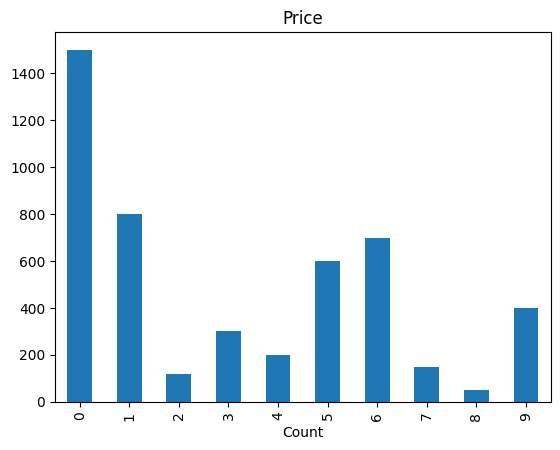

In [35]:

df["Price"].plot(kind="bar")
plt.title('Price')
plt.xlabel('Count')


7. Vẽ biểu đồ phân tán cho <Quantity> và <Price>.

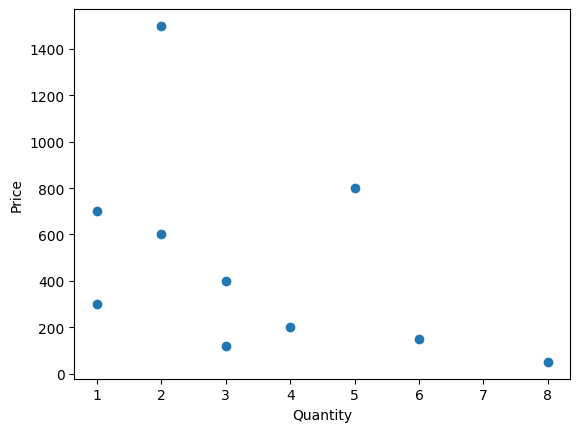

In [29]:
plt.scatter(df["Quantity"], df["Price"])
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.show()

8. Vẽ biểu đồ đường cho cột <Date>.

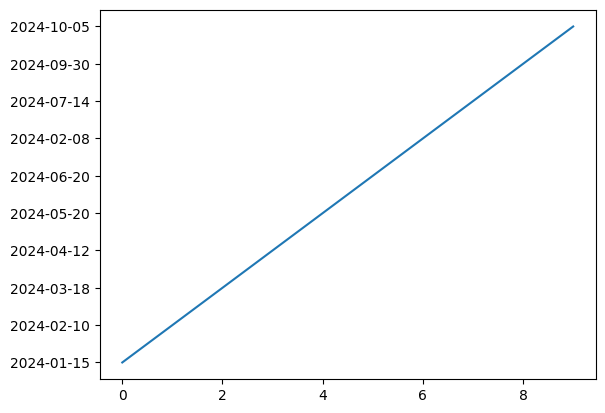

In [34]:
plt.plot(df['Date'])
plt.show()

9. Vẽ biểu đồ cột thể hiện tổng doanh thu của từng <Category>.

<AxesSubplot:>

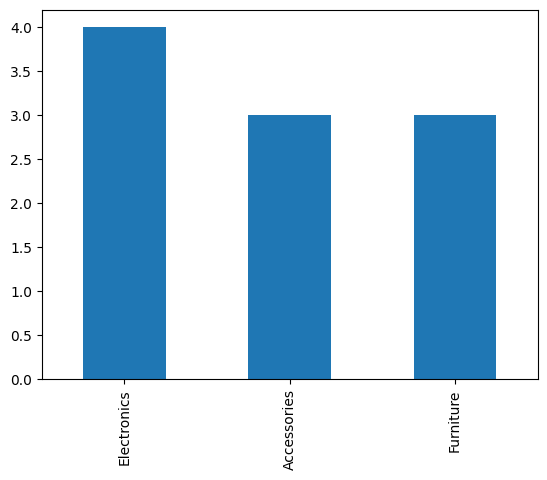

In [38]:
df['Category'].value_counts().plot(kind='bar')


10. Kiểm tra có giá trị NaN nào trong DataFrame không

In [39]:
print(df.isnull().sum())

Product     0
Category    0
Price       0
Date        0
Quantity    0
dtype: int64


11. Tìm các giá trị trùng lặp trong DataFrame dựa trên cột 'Product' và loại bỏ các hàng trùng lặp, giữ lại hàng đầu tiên.

In [43]:
df = df.drop_duplicates(subset=["Product"], keep="first")
print(df)

     Product     Category  Price        Date  Quantity
0     Laptop  Electronics   1500  2024-01-15         2
1      Phone  Electronics    800  2024-02-10         5
2      Chair    Furniture    120  2024-03-18         3
3       Desk    Furniture    300  2024-04-12         1
4  Headphone  Accessories    200  2024-05-20         4
5    Monitor  Electronics    600  2024-06-20         2
6       Sofa    Furniture    700  2024-02-08         1
7   Keyboard  Accessories    150  2024-07-14         6
8      Mouse  Accessories     50  2024-09-30         8
9     Tablet  Electronics    400  2024-10-05         3


12. Lọc ra các đơn hàng có số lượng (Quantity) lớn hơn 5

In [45]:
filtered_df = df[df['Quantity'] > 5]
print(filtered_df)

    Product     Category  Price        Date  Quantity
7  Keyboard  Accessories    150  2024-07-14         6
8     Mouse  Accessories     50  2024-09-30         8


13. Tổng doanh thu được tính theo công thức sau:

In [49]:
df['Revenue'] = df['Quantity'] * df['Price']
df.head(5)

,Product,Category,Price,Date,Quantity,Revenue,Sales_Level
0,Laptop,Electronics,1500,2024-01-15,2,3000,High
1,Phone,Electronics,800,2024-02-10,5,4000,High
2,Chair,Furniture,120,2024-03-18,3,360,Low
3,Desk,Furniture,300,2024-04-12,1,300,Low
4,Headphone,Accessories,200,2024-05-20,4,800,Medium


14. Thêm một cột <Sales_Level> với điều kiện:

In [48]:
def categorize_sales(revenue):
    if revenue < 500:
        return 'Low'
    elif 500 <= revenue <= 2000:
        return 'Medium'
    else:
        return 'High'

df['Sales_Level'] = df['Revenue'].apply(categorize_sales)

# Hiển thị kết quả
print(df)

     Product     Category  Price        Date  Quantity  Revenue Sales_Level
0     Laptop  Electronics   1500  2024-01-15         2     3000        High
1      Phone  Electronics    800  2024-02-10         5     4000        High
2      Chair    Furniture    120  2024-03-18         3      360         Low
3       Desk    Furniture    300  2024-04-12         1      300         Low
4  Headphone  Accessories    200  2024-05-20         4      800      Medium
5    Monitor  Electronics    600  2024-06-20         2     1200      Medium
6       Sofa    Furniture    700  2024-02-08         1      700      Medium
7   Keyboard  Accessories    150  2024-07-14         6      900      Medium
8      Mouse  Accessories     50  2024-09-30         8      400         Low
9     Tablet  Electronics    400  2024-10-05         3     1200      Medium


15. Vẽ biểu đồ cột thể hiện số lượng đơn hàng ở từng mức <Sales_Level>.

<AxesSubplot:>

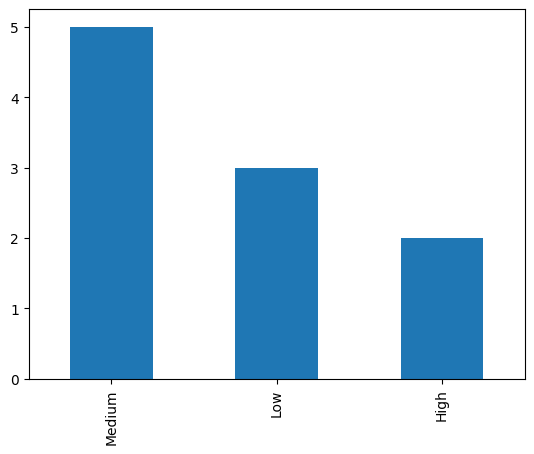

In [50]:
df['Sales_Level'].value_counts().plot(kind='bar')

16. Tạo một cột mới <Discount> với giá trị giảm giá 10% nếu doanh thu (Revenue) > 1000, ngược lại giảm giá 5%.

In [53]:
df['Discount'] = df['Revenue'].apply(lambda x: x * 0.1 if x > 1000 else x * 0.05)
df.head(10)

,Product,Category,Price,Date,Quantity,Revenue,Sales_Level,Discount
0,Laptop,Electronics,1500,2024-01-15,2,3000,High,300.0
1,Phone,Electronics,800,2024-02-10,5,4000,High,400.0
2,Chair,Furniture,120,2024-03-18,3,360,Low,18.0
3,Desk,Furniture,300,2024-04-12,1,300,Low,15.0
4,Headphone,Accessories,200,2024-05-20,4,800,Medium,40.0
5,Monitor,Electronics,600,2024-06-20,2,1200,Medium,120.0
6,Sofa,Furniture,700,2024-02-08,1,700,Medium,35.0
7,Keyboard,Accessories,150,2024-07-14,6,900,Medium,45.0
8,Mouse,Accessories,50,2024-09-30,8,400,Low,20.0
9,Tablet,Electronics,400,2024-10-05,3,1200,Medium,120.0


17. Tính doanh thu sau giảm giá <Final_Revenue> bằng công thức:

In [55]:
df['Final_Revenue'] = df['Revenue'] - (df['Revenue'] * df['Discount'])
df.head(5)

,Product,Category,Price,Date,Quantity,Revenue,Sales_Level,Discount,Final_Revenue
0,Laptop,Electronics,1500,2024-01-15,2,3000,High,300.0,-897000.0
1,Phone,Electronics,800,2024-02-10,5,4000,High,400.0,-1596000.0
2,Chair,Furniture,120,2024-03-18,3,360,Low,18.0,-6120.0
3,Desk,Furniture,300,2024-04-12,1,300,Low,15.0,-4200.0
4,Headphone,Accessories,200,2024-05-20,4,800,Medium,40.0,-31200.0


18. Tạo cột <Month> lấy giá trị tháng từ cột <Date>.


In [57]:
# Chuyển cột Date thành kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.head(5)

,Product,Category,Price,Date,Quantity,Revenue,Sales_Level,Discount,Final_Revenue,Month
0,Laptop,Electronics,1500,2024-01-15,2,3000,High,300.0,-897000.0,1
1,Phone,Electronics,800,2024-02-10,5,4000,High,400.0,-1596000.0,2
2,Chair,Furniture,120,2024-03-18,3,360,Low,18.0,-6120.0,3
3,Desk,Furniture,300,2024-04-12,1,300,Low,15.0,-4200.0,4
4,Headphone,Accessories,200,2024-05-20,4,800,Medium,40.0,-31200.0,5


19. Vẽ biểu đồ đường thể hiện tổng doanh thu theo tháng.

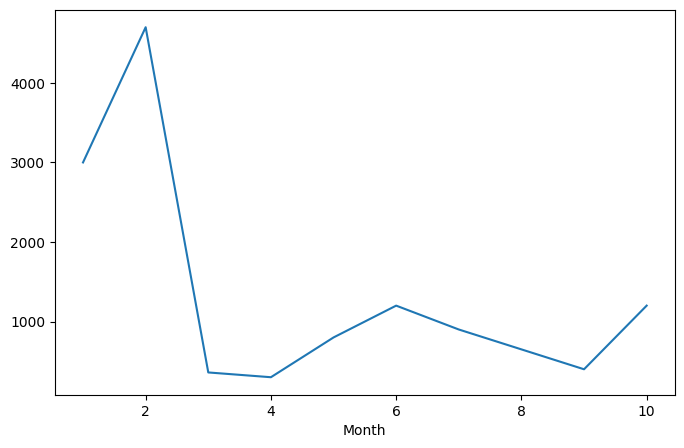

In [59]:
import seaborn as sns
# Tính tổng doanh thu theo tháng
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Vẽ biểu đồ đường
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values,)
plt.show()

20. Lưu DataFrame với tên <BKT_MSSV_Hoten.csv-->

In [60]:
df.to_csv("BKT_2274802010424_TranAnhKhoa.csv", index=False)